# Customer segmentation

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [60]:
data = pd.read_csv("data\HotelCustomersDataset.csv")

In [61]:
data.head(3)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
data.shape

(83590, 31)

In [63]:
features = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [64]:
data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

### Checking missing values

In [65]:
data.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### Identify duplicates

In [66]:
dups = data.duplicated()
data[dups]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom


### Columns info

In [67]:
data.select_dtypes(include='object')

,Nationality,NameHash,DocIDHash,DistributionChannel,MarketSegment
0,PRT,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,Corporate,Corporate
1,PRT,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,Travel Agent/Operator,Travel Agent/Operator
2,DEU,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,Travel Agent/Operator,Travel Agent/Operator
3,FRA,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,Travel Agent/Operator,Travel Agent/Operator
4,FRA,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,Travel Agent/Operator,Travel Agent/Operator
...,...,...,...,...,...
83585,ITA,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,Travel Agent/Operator,Other
83586,IRL,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,Travel Agent/Operator,Other
83587,IRL,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,Travel Agent/Operator,Other
83588,IRL,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,Travel Agent/Operator,Other


In [68]:
data['Nationality'].value_counts()

FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [69]:
data['DistributionChannel'].value_counts()

Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: DistributionChannel, dtype: int64

In [70]:
data['MarketSegment'].value_counts()

Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: MarketSegment, dtype: int64

#### Float columns

In [71]:
data.select_dtypes(include="float")

,Age,LodgingRevenue,OtherRevenue
0,51.0,371.0,105.3
1,NaN,280.0,53.0
2,31.0,0.0,0.0
3,60.0,240.0,60.0
4,51.0,0.0,0.0
...,...,...,...
83585,54.0,0.0,0.0
83586,47.0,327.1,277.5
83587,53.0,0.0,0.0
83588,85.0,981.3,9.0


#### Integer columns

In [72]:
data.select_dtypes(include="int")

,ID,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,150,45,1,0,3,8,5,151,1074,...,0,0,0,0,0,0,0,0,0,0
1,2,1095,61,0,0,1,10,5,1100,1100,...,0,0,0,0,0,0,0,0,0,0
2,3,1095,0,0,0,0,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,4,1095,93,0,0,1,10,5,1100,1100,...,0,0,0,0,0,0,0,0,0,0
4,5,1095,0,0,0,0,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,0,0,0,0,0,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
83586,83587,0,109,0,0,1,6,3,3,3,...,0,0,0,0,1,0,0,0,0,0
83587,83588,0,0,0,0,0,0,0,-1,-1,...,0,0,0,0,1,0,0,0,0,0
83588,83589,0,109,0,0,1,6,3,3,3,...,0,0,0,0,0,1,0,0,0,0


### Encoding categorical features

In [73]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Nationality',
 'NameHash',
 'DocIDHash',
 'DistributionChannel',
 'MarketSegment']

In [74]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  int32  
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  int32  
 5   DocIDHash             83590 non-null  int32  
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

### Handling missing values

#### with most frequent value

In [75]:
data_with_most_frequent = data.copy()
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_with_most_frequent['Age'] = imp_most_frequent.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data_with_most_frequent.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

#### with KNN method

In [76]:
data_with_knn = data.copy()
imp_knn = KNNImputer(n_neighbors=2)
data_with_knn['Age'] = imp_knn.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data_with_knn.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

### Descriptive statistics

In [77]:
data.describe()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,75.550114,45.398028,453.640902,40324.441213,38045.935973,66.196028,298.802087,67.589132,0.002022,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,45.869324,16.572368,313.390291,23285.983630,21830.938883,87.758990,372.851892,114.327776,0.066770,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,43.000000,34.000000,177.000000,20152.250000,20103.000000,0.000000,59.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,57.000000,46.000000,397.000000,40359.500000,36691.500000,29.000000,234.000000,38.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,123.000000,57.000000,723.000000,60491.750000,56845.750000,103.000000,402.000000,87.675000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,187.000000,122.000000,1095.000000,80641.000000,76992.000000,588.000000,21781.000000,7730.250000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
data_with_most_frequent.describe()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,75.550114,45.606077,453.640902,40324.441213,38045.935973,66.196028,298.802087,67.589132,0.002022,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,45.869324,16.221625,313.390291,23285.983630,21830.938883,87.758990,372.851892,114.327776,0.066770,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,43.000000,34.000000,177.000000,20152.250000,20103.000000,0.000000,59.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,57.000000,47.000000,397.000000,40359.500000,36691.500000,29.000000,234.000000,38.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,123.000000,56.000000,723.000000,60491.750000,56845.750000,103.000000,402.000000,87.675000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,187.000000,122.000000,1095.000000,80641.000000,76992.000000,588.000000,21781.000000,7730.250000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
data_with_knn.describe()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,75.550114,45.398028,453.640902,40324.441213,38045.935973,66.196028,298.802087,67.589132,0.002022,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,45.869324,16.193423,313.390291,23285.983630,21830.938883,87.758990,372.851892,114.327776,0.066770,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,43.000000,34.000000,177.000000,20152.250000,20103.000000,0.000000,59.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,57.000000,45.398028,397.000000,40359.500000,36691.500000,29.000000,234.000000,38.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,123.000000,56.000000,723.000000,60491.750000,56845.750000,103.000000,402.000000,87.675000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,187.000000,122.000000,1095.000000,80641.000000,76992.000000,588.000000,21781.000000,7730.250000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Droping unimportant columns

In [80]:
data_wo_idhash = data.copy()
data_with_most_frequent_wo_idhash = data_with_most_frequent.copy()
data_with_knn_wo_idhash = data_with_knn.copy()

data_wo_idhash = data_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])
data_with_most_frequent_wo_idhash = data_with_most_frequent_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])
data_with_knn_wo_idhash = data_with_knn_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])

### Correlation between features

<AxesSubplot: >

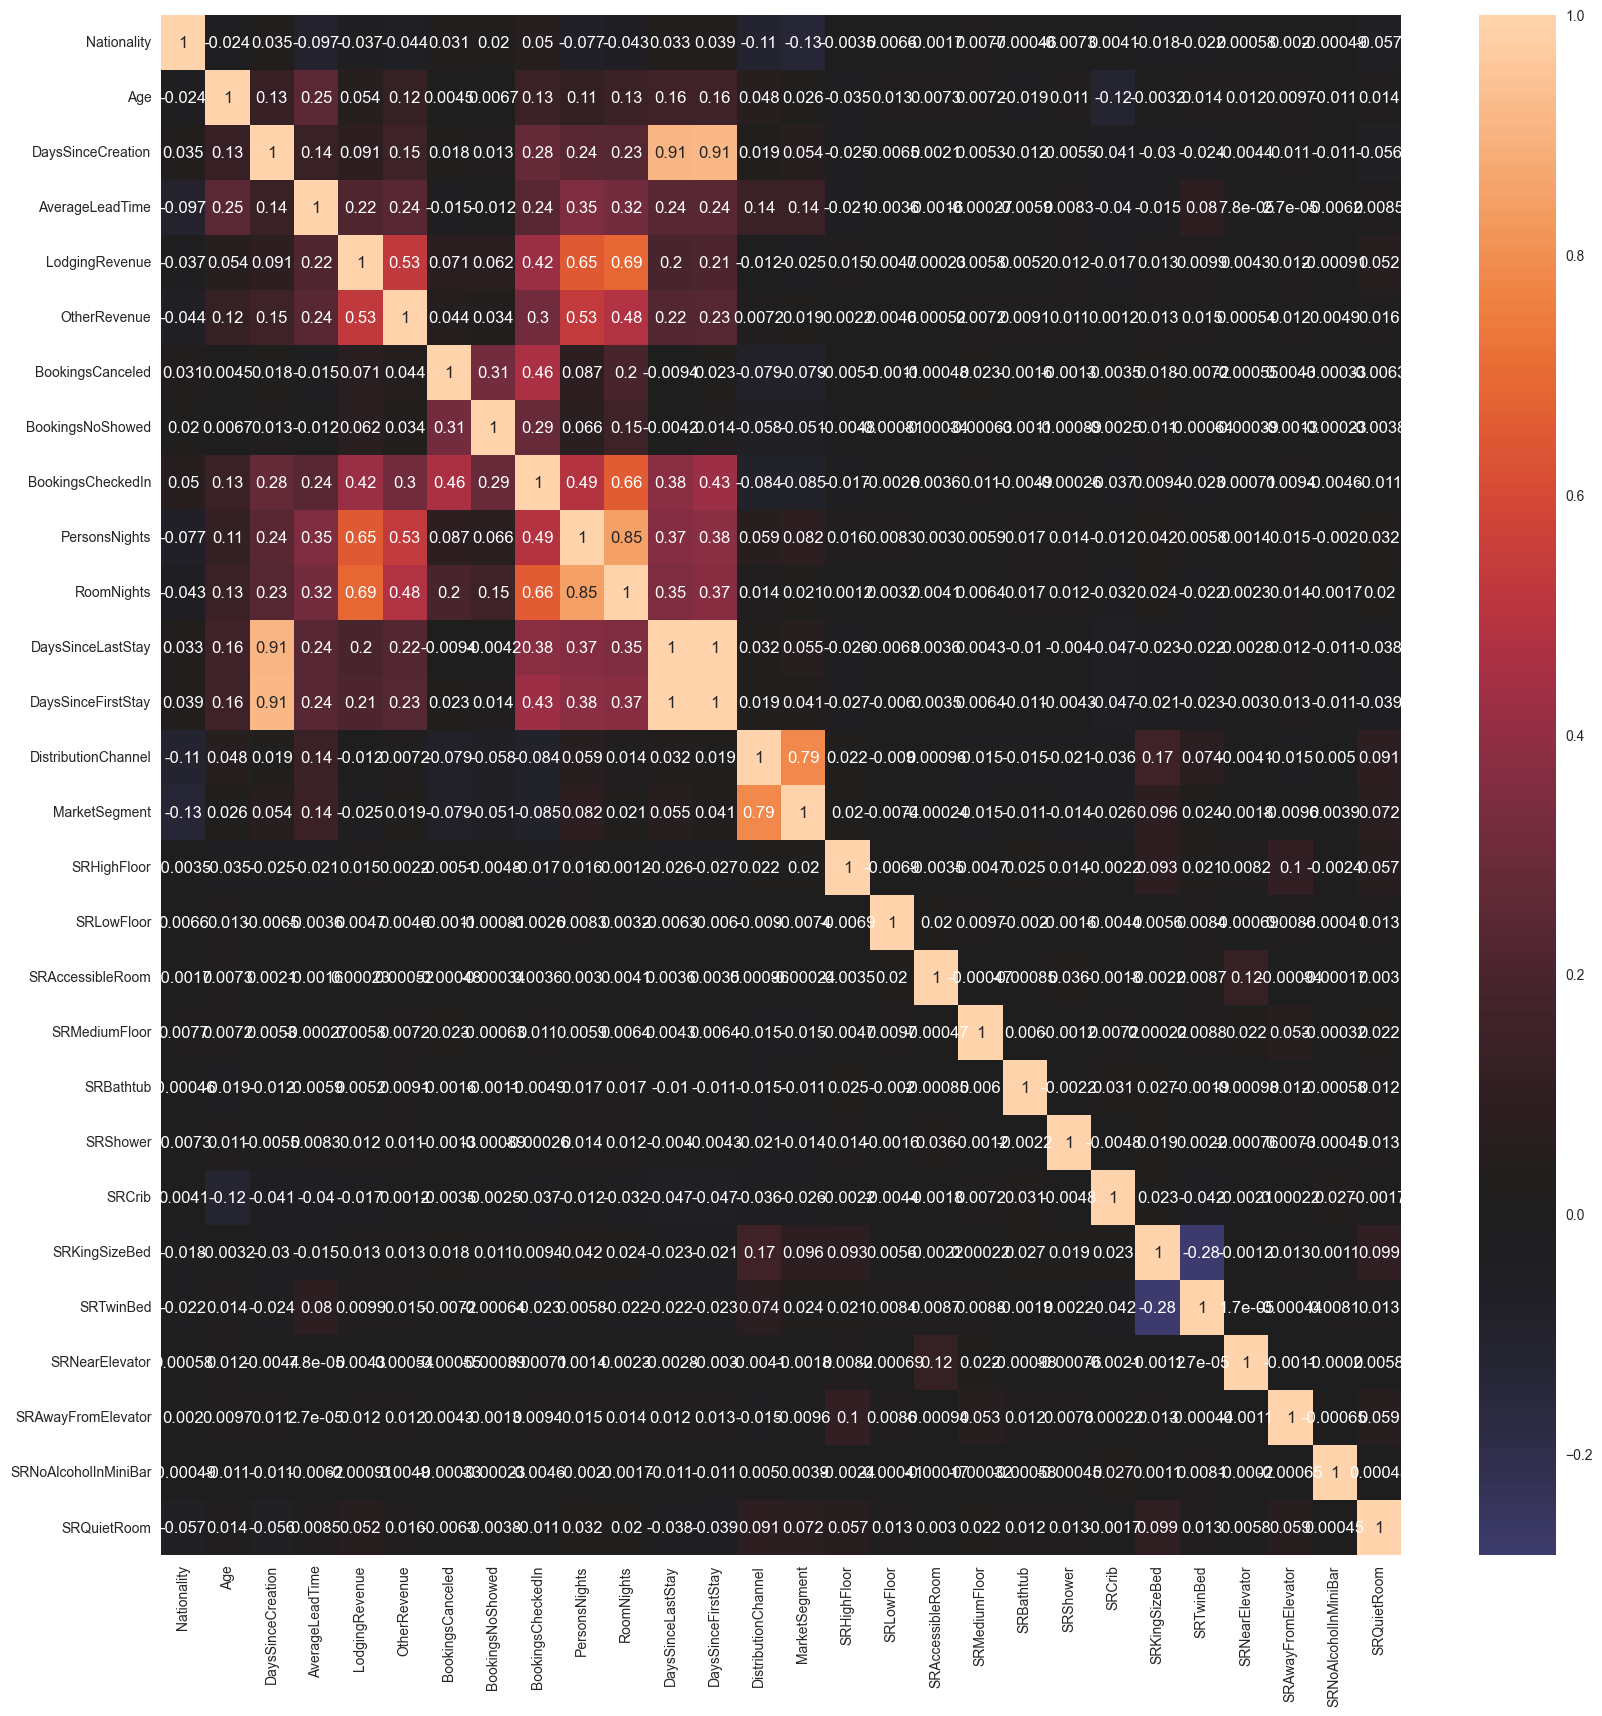

In [81]:
plt.figure(figsize=(20,20))  
sns.heatmap(data_wo_idhash.corr(), annot=True, center=0)

### Dimensionality reduction

In [95]:
pca = PCA(n_components=3)
pca.fit(data_with_knn)
reduced_data = pd.DataFrame(pca.transform(data_with_knn), columns=(["c1","c2", "c3"]))

pca = PCA(n_components=3)
pca.fit(data_with_knn_wo_idhash)
reduced_data_wo_idhash = pd.DataFrame(pca.transform(data_with_knn_wo_idhash), columns=(["c1","c2", "c3"]))

### Determinating number of clusters

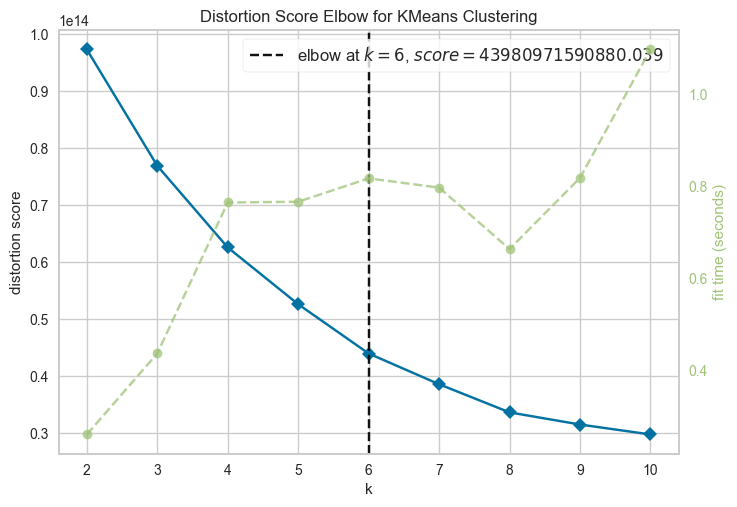

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_with_knn)
Elbow_M.show()

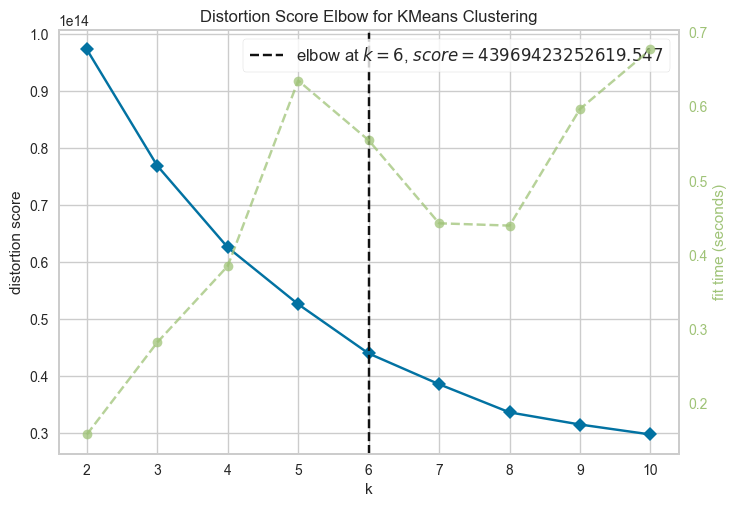

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data)
Elbow_M.show()

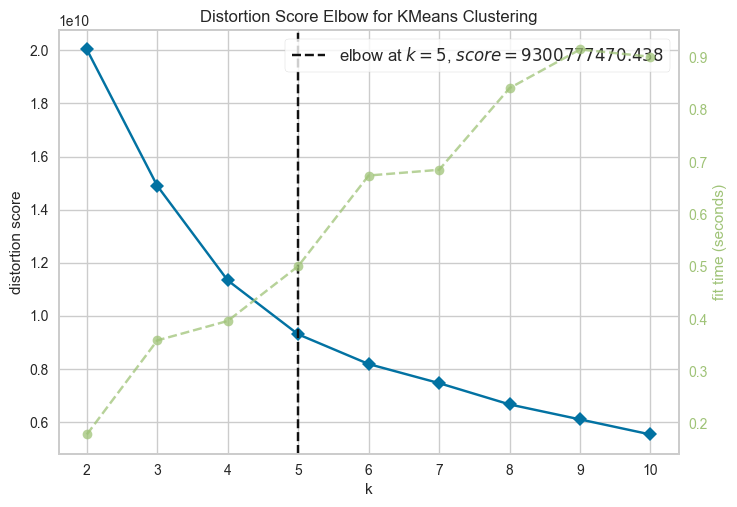

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_with_knn_wo_idhash)
Elbow_M.show()

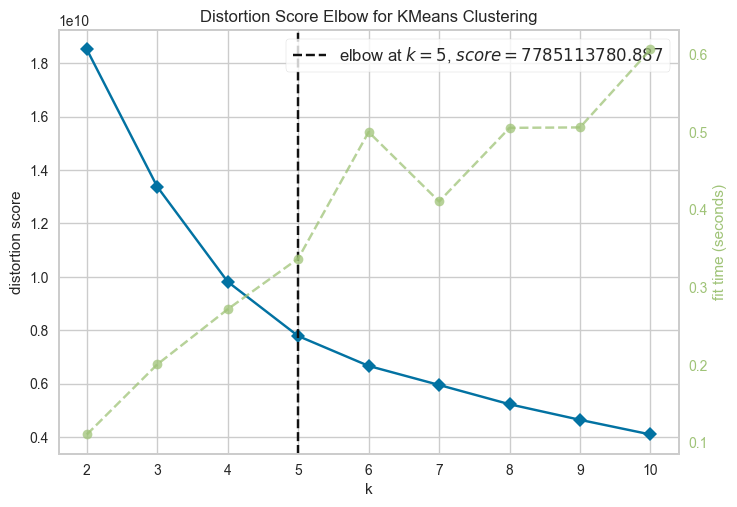

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data_wo_idhash)
Elbow_M.show()

### Clustering Models

#### KMeans

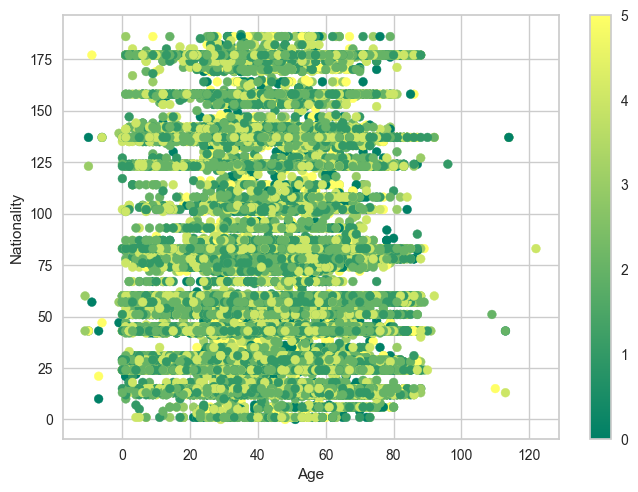

In [87]:
features = data_with_knn.copy()
kmeans_model = KMeans(n_clusters=6)
clust_labels = kmeans_model.fit_predict(data_with_knn)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

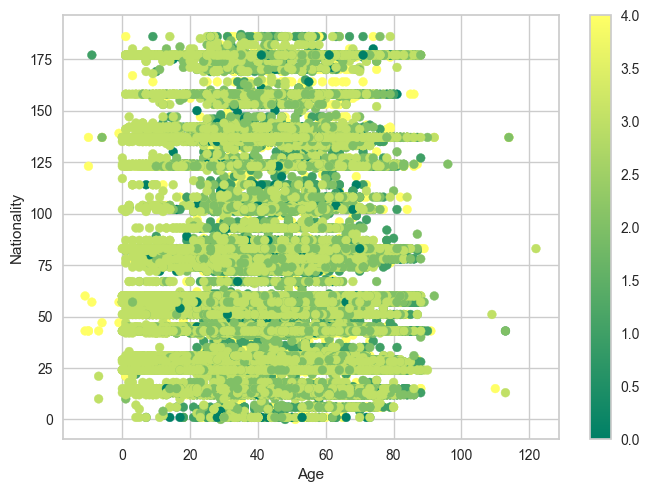

In [88]:
features = data_with_knn_wo_idhash.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

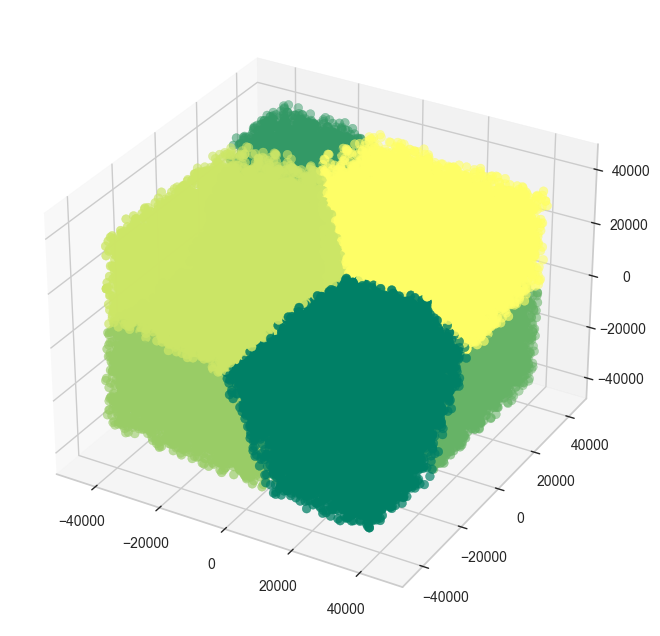

In [97]:
features = reduced_data.copy()
kmeans_model = KMeans(n_clusters=6)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

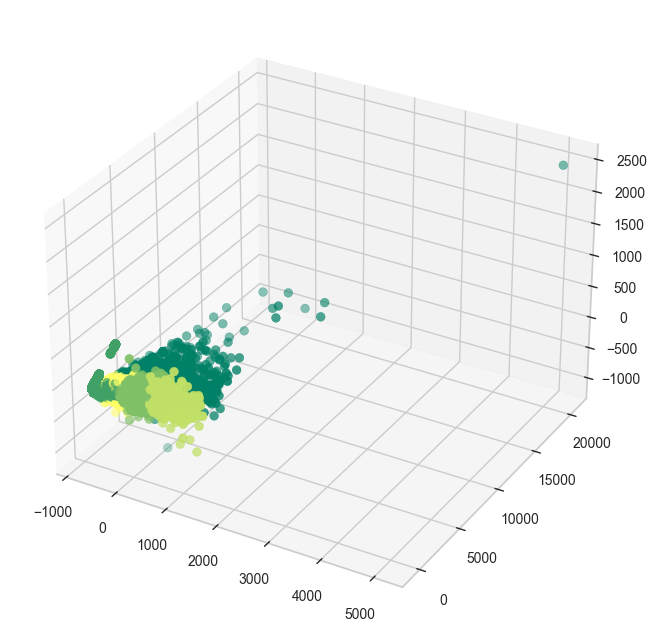

In [98]:
features = reduced_data_wo_idhash.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
plt.show()

#### Agglomerative Clustering

In [93]:
# TODO

#### Affinity Propagation

In [94]:
# TODO